In [1]:
import os, cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

In [8]:
train_directory = "./dataset"
#test_directory = "./test"
load_data = tf.keras.preprocessing.image_dataset_from_directory

train_data = load_data(
    train_directory,
    labels = "inferred",
    label_mode = "categorical",
    image_size = [64, 64],
    color_mode = "grayscale",
    interpolation = "nearest",
    batch_size = 32,
    shuffle = True,
)
"""
test_data = load_data(
    test_directory,
    labels = "inferred",
    label_mode = "categorical",
    image_size = [128, 128],
    color_mode = "grayscale",
    interpolation = "nearest",
    batch_size = 256,
    shuffle = False,
)
"""

Found 1980 files belonging to 36 classes.


'\ntest_data = load_data(\n    test_directory,\n    labels = "inferred",\n    label_mode = "categorical",\n    image_size = [128, 128],\n    color_mode = "grayscale",\n    interpolation = "nearest",\n    batch_size = 256,\n    shuffle = False,\n)\n'

In [5]:
# Building
model = Sequential([
    # Convulational Base
    Conv2D(64, kernel_size = 3, strides = 1, activation = 'relu', input_shape = [64, 64, 1]),
    MaxPooling2D(pool_size = (2, 2)),
    
    Conv2D(128, kernel_size = 3, strides = 1, activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    
    Conv2D(256, kernel_size = 3, strides = 1, activation = 'relu'),
    
    # Head
    Flatten(),
    
    Dense(64, activation = 'relu'),
    Dropout(0.1),
    
    Dense(64, activation = 'relu'),
    Dropout(0.1),
    
    # Output
    Dense(36, activation = 'softmax'),
])

# Compiling
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"],
)

# Summarizing
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [10]:
model.fit(
    train_data,
    epochs = 5,
)

model.save('models/mymodelv2', save_format = 'h5')

Epoch 1/5
62/62 [==============================] - 25s 394ms/step - loss: 0.0976 - accuracy: 0.9702
Epoch 2/5
62/62 [==============================] - 25s 397ms/step - loss: 0.1029 - accuracy: 0.9712
Epoch 3/5
62/62 [==============================] - 26s 411ms/step - loss: 0.0700 - accuracy: 0.9768
Epoch 4/5
62/62 [==============================] - 26s 411ms/step - loss: 0.0697 - accuracy: 0.9753
Epoch 5/5
62/62 [==============================] - 26s 414ms/step - loss: 0.0661 - accuracy: 0.9758


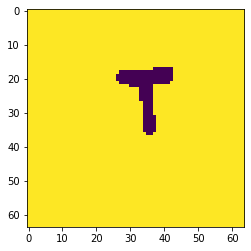

In [27]:
for item in train_data:
    image = np.array(item[0][0])
    plt.imshow(image)
    break